# Package Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Data Preprocessing

In [2]:
# load data & print a preview
transactions_df = pd.read_json("data/transactions.txt", lines=True)
transactions_df.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000,5000.0,2016-08-13T14:27:32,98.55,Uber,US,US,02,...,,0.0,,,,False,,,False,False
1,737265056,737265056,5000,5000.0,2016-10-11T05:05:54,74.51,AMC #191138,US,US,09,...,,0.0,,,,True,,,False,False
2,737265056,737265056,5000,5000.0,2016-11-08T09:18:39,7.47,Play Store,US,US,09,...,,0.0,,,,False,,,False,False
3,737265056,737265056,5000,5000.0,2016-12-10T02:14:50,7.47,Play Store,US,US,09,...,,0.0,,,,False,,,False,False
4,830329091,830329091,5000,5000.0,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,02,...,,0.0,,,,True,,,False,False


In [3]:
# printing the datatypes of each column to help with data analysis
transactions_df.dtypes

accountNumber                 int64
customerId                    int64
creditLimit                   int64
availableMoney              float64
transactionDateTime          object
transactionAmount           float64
merchantName                 object
acqCountry                   object
merchantCountryCode          object
posEntryMode                 object
posConditionCode             object
merchantCategoryCode         object
currentExpDate               object
accountOpenDate              object
dateOfLastAddressChange      object
cardCVV                       int64
enteredCVV                    int64
cardLast4Digits               int64
transactionType              object
echoBuffer                   object
currentBalance              float64
merchantCity                 object
merchantState                object
merchantZip                  object
cardPresent                    bool
posOnPremises                object
recurringAuthInd             object
expirationDateKeyInMatch    

In [4]:
# get number of records and fields in each record
data_shape = transactions_df.shape
print(f"The raw transactions data has {data_shape[0]} records and {data_shape[1]} fields.")

The raw transactions data has 786363 records and 29 fields.


### Counting Null + Empty Strings Per Column

In [5]:
# count null + empty str values in each field (Note: I'm treating both null and empty string as null)
null_count = transactions_df.isna().sum()
empty_str_count = transactions_df.select_dtypes(include='object').apply(lambda x: x.str.strip().eq('')).sum()
total_null_count = null_count.add(empty_str_count, fill_value=0).astype(int).sort_values(ascending=False)

total_null_count

recurringAuthInd            786363
posOnPremises               786363
merchantZip                 786363
merchantState               786363
echoBuffer                  786363
merchantCity                786363
acqCountry                    4562
posEntryMode                  4054
merchantCountryCode            724
transactionType                698
posConditionCode               409
merchantCategoryCode             0
transactionDateTime              0
transactionAmount                0
merchantName                     0
accountNumber                    0
isFraud                          0
accountOpenDate                  0
enteredCVV                       0
dateOfLastAddressChange          0
customerId                       0
currentExpDate                   0
currentBalance                   0
creditLimit                      0
cardPresent                      0
cardLast4Digits                  0
cardCVV                          0
availableMoney                   0
expirationDateKeyInM

### Getting Minimum and Maximum Values Per Column

In [6]:
# get the min value for each numeric column
min_values = transactions_df.select_dtypes(include=['int64', 'float64']).min().astype(int)
min_values

accountNumber        100088067
customerId           100088067
creditLimit                250
availableMoney           -1005
transactionAmount            0
cardCVV                    100
enteredCVV                   0
cardLast4Digits              0
currentBalance               0
dtype: int64

In [7]:
# get the max value for each numeric column
max_values = transactions_df.select_dtypes(include=['int64', 'float64']).max().astype(int)
max_values

accountNumber        999389635
customerId           999389635
creditLimit              50000
availableMoney           50000
transactionAmount         2011
cardCVV                    998
enteredCVV                 998
cardLast4Digits           9998
currentBalance           47498
dtype: int64

### Get Count Of Unique Values For Each Column

In [8]:
# get unique values per column
unique_values_per_column = transactions_df.nunique().sort_values(ascending=False)
unique_values_per_column

transactionDateTime         776637
availableMoney              521915
currentBalance              487318
transactionAmount            66038
cardLast4Digits               5245
accountNumber                 5000
customerId                    5000
merchantName                  2490
dateOfLastAddressChange       2184
accountOpenDate               1820
enteredCVV                     976
cardCVV                        899
currentExpDate                 165
merchantCategoryCode            19
creditLimit                     10
posEntryMode                     6
merchantCountryCode              5
acqCountry                       5
transactionType                  4
posConditionCode                 4
cardPresent                      2
expirationDateKeyInMatch         2
isFraud                          2
merchantZip                      1
merchantState                    1
posOnPremises                    1
recurringAuthInd                 1
merchantCity                     1
echoBuffer          

In [9]:
# .describe() can actually give us a lot of the above information as well as std, quartiles, and mean in one go
transactions_df.describe().astype(int)

,accountNumber,customerId,creditLimit,availableMoney,transactionAmount,cardCVV,enteredCVV,cardLast4Digits,currentBalance
count,786363,786363,786363,786363,786363,786363,786363,786363,786363
mean,537232599,537232599,10759,6250,136,544,544,4757,4508
std,255421092,255421092,11636,8880,147,261,261,2996,6457
min,100088067,100088067,250,-1005,0,100,0,0,0
25%,330133277,330133277,5000,1077,33,310,310,2178,689
50%,507456073,507456073,7500,3184,87,535,535,4733,2451
75%,767620004,767620004,15000,7500,191,785,785,7338,5291
max,999389635,999389635,50000,50000,2011,998,998,9998,47498


# Question 1 - Load

- Programmatically download and load into your favorite analytical tool the transactions data. This data, which is in line-delimited JSON format, can be found [here](https://github.com/CapitalOneRecruiting/DS)
- Please describe the structure of the data. Number of records and fields in each record?

The data seems to be a list of transactions made by a set of customers. There are 786363 records and each record has 29 fields.

---

- Please provide some additional basic summary statistics for each field. Be sure to include a count of null, minimum, maximum, and unique values where appropriate.

Through an initial check, there were no null values in any column of the provided transactions dataset. However, I did find many fields had an empty string as a value. I decided to treat these as null values. The counts are included in the code cells above!

It only makes sense to calculate the minimum and maximum values of the numerical data, so that I what I did. The minimum and maximum values are included in the code cells above!

I decided to calculate the # of unique values for each column just to have a better idea of how the data looked. Looking at the # of unique values per column, I thought the results for accountNumber, customerId, and merchantName to be particularly useful. This is because we have a sizable number of transaction records (over 700000+) for 5000 customers and 2490 merchants. This data can be used to analyze individual account behaviors as well as customer-merchant relationships. Taking it one step further, this information could be used to help detect fraud or personalized marketing (ex. cashback deals for their favorite or most popular merchants). The unique values for these columns are in the code cells above!

# Data Visualization

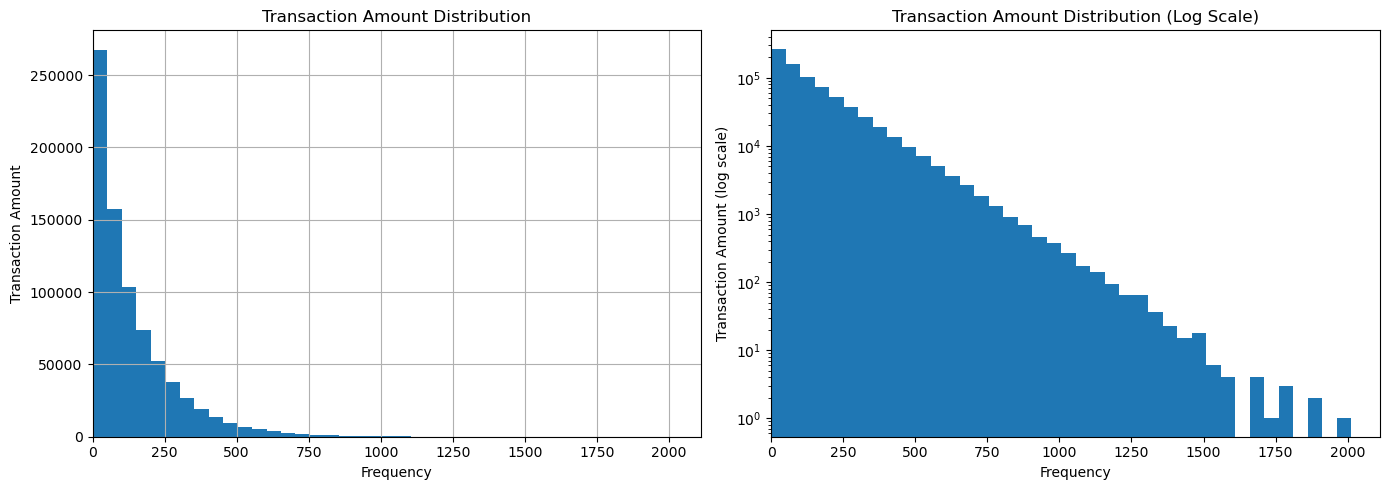

In [10]:
# get processed amount per transaction
processed_amts = transactions_df['transactionAmount']

# plot histogram of processed amounts
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
nonlog_histogram, log_histogram = axes

nonlog_histogram.hist(processed_amts, bins=40) # bins=40 -> per $50 range
nonlog_histogram.set_xlim(0, )
nonlog_histogram.set_xlabel('Frequency')
nonlog_histogram.set_ylabel('Transaction Amount')
nonlog_histogram.set_title('Transaction Amount Distribution')
nonlog_histogram.grid(True)

log_histogram.hist(processed_amts, bins=40)
log_histogram.set_xlim(0, )
log_histogram.set_xlabel('Frequency')
log_histogram.set_ylabel('Transaction Amount (log scale)')
log_histogram.set_title('Transaction Amount Distribution (Log Scale)')
log_histogram.set_yscale('log')

plt.tight_layout()
plt.show()

# Question 2 - Plot
- Plot a histogram of the processed amounts of each transaction, the transactionAmount column.
- Report any structure you find and any hypotheses you have about that structure.

Through the initial histogram plot of the processed amounts per transaction, I found that the data generally followed a log scale (where as the transaction amounts increased, the frequency of those amounts decreased logarithmically). I played around with the bins setting on the histogram plots and I felt having a histogram bar for every $50 range really illustrated that log scale behavior. Additionally, I chose to plot the same histogram with a log scale to verify that the data is indeed logarithmic in nature. Both the regular and log scale histograms are shown above!

Here is when I realized the possibilities of outliers in the transaction data, but when it comes down to fraud detection, keeping/removing outliers is a complex question. I will be making two datasets, one with outliers and one without, to see how the models perform in each case.

# Data Cleaning
- Based on the initial look at the data, I can already perform some data cleaning!

### Handling Null/Empty String Values
- dropping null columns
- filling in null values with the mean/mode of the column

In [11]:
# print the unique values for the fields that are missing values
for col in total_null_count.index:
    if total_null_count[col] > 0:
        print(f"{col}: {transactions_df[col].unique()}")

recurringAuthInd: ['']
posOnPremises: ['']
merchantZip: ['']
merchantState: ['']
echoBuffer: ['']
merchantCity: ['']
acqCountry: ['US' '' 'CAN' 'MEX' 'PR']
posEntryMode: ['02' '09' '05' '80' '90' '']
merchantCountryCode: ['US' 'CAN' '' 'PR' 'MEX']
transactionType: ['PURCHASE' 'ADDRESS_VERIFICATION' 'REVERSAL' '']
posConditionCode: ['01' '08' '99' '']


In [12]:
# based on this information, we can drop 'recurringAuthInd', 'posOnPremises', 'merchantZip', 'merchantState', 'echoBuffer', and 'merchantCity'
clean_transactions_df = transactions_df.drop(columns=['recurringAuthInd', 'posOnPremises', 'merchantZip', 'merchantState', 'echoBuffer', 'merchantCity'])
clean_transactions_df.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000,5000.0,2016-08-13T14:27:32,98.55,Uber,US,US,02,...,2015-03-14,2015-03-14,414,414,1803,PURCHASE,0.0,False,False,False
1,737265056,737265056,5000,5000.0,2016-10-11T05:05:54,74.51,AMC #191138,US,US,09,...,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.0,True,False,False
2,737265056,737265056,5000,5000.0,2016-11-08T09:18:39,7.47,Play Store,US,US,09,...,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.0,False,False,False
3,737265056,737265056,5000,5000.0,2016-12-10T02:14:50,7.47,Play Store,US,US,09,...,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.0,False,False,False
4,830329091,830329091,5000,5000.0,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,02,...,2015-08-06,2015-08-06,885,885,3143,PURCHASE,0.0,True,False,False


In the process of removing null/empty string values from the dataset, I realized that some records had an empty string for the categorical field. Because the majority of the fields in each record are not null/empty strings, I will impute them with the mode of the column.

In [13]:
# impute missing values for 'acqCountry', 'posEntryMode', 'merchantCountryCode', 'transactionType', and 'posConditionCode' with mode
clean_transactions_df['acqCountry'] = clean_transactions_df['acqCountry'].fillna(clean_transactions_df['acqCountry'].mode()[0])
clean_transactions_df['posEntryMode'] = clean_transactions_df['posEntryMode'].fillna(clean_transactions_df['posEntryMode'].mode()[0])
clean_transactions_df['merchantCountryCode'] = clean_transactions_df['merchantCountryCode'].fillna(clean_transactions_df['merchantCountryCode'].mode()[0])
clean_transactions_df['transactionType'] = clean_transactions_df['transactionType'].fillna(clean_transactions_df['transactionType'].mode()[0])
clean_transactions_df['posConditionCode'] = clean_transactions_df['posConditionCode'].fillna(clean_transactions_df['posConditionCode'].mode()[0])

# confirm that there are no more missing values
clean_transactions_df.isna().sum()

accountNumber               0
customerId                  0
creditLimit                 0
availableMoney              0
transactionDateTime         0
transactionAmount           0
merchantName                0
acqCountry                  0
merchantCountryCode         0
posEntryMode                0
posConditionCode            0
merchantCategoryCode        0
currentExpDate              0
accountOpenDate             0
dateOfLastAddressChange     0
cardCVV                     0
enteredCVV                  0
cardLast4Digits             0
transactionType             0
currentBalance              0
cardPresent                 0
expirationDateKeyInMatch    0
isFraud                     0
dtype: int64

### Handling Reversed Transactions
- To handle this, I will use the transactionType field to filter out the reversed transactions and use those records to find the matching original transaction.

In [14]:
# use 'transactionDateTime' to create 'transactionDate' and 'transactionTime' columns
clean_transactions_df['transactionDateTime'] = pd.to_datetime(clean_transactions_df['transactionDateTime'])

# sort by 'customerId', 'merchantName', and then 'transactionDateTime' in ascending order (earliest to latest)
clean_transactions_df = clean_transactions_df.sort_values(by=['customerId', 'merchantName', 'transactionAmount', 'transactionDateTime'], ascending=True)

# reset dataframe indexes before proceeding
clean_transactions_df = clean_transactions_df.reset_index(drop=True)
clean_transactions_df.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud
0,100088067,100088067,50000,49953.81,2016-04-08 19:56:36,200.12,1st BBQ,US,US,09,...,2014-01-09,2014-01-09,546,546,4615,PURCHASE,46.19,True,False,False
1,100088067,100088067,50000,49929.31,2016-11-09 07:26:06,95.11,1st Pub,US,US,02,...,2014-01-09,2014-01-09,402,402,2077,PURCHASE,70.69,True,False,False
2,100088067,100088067,50000,49996.04,2016-05-06 02:54:01,5.26,1st Sandwitch Bar #758805,US,US,02,...,2014-01-09,2014-01-09,546,546,4615,PURCHASE,3.96,True,False,False
3,100088067,100088067,50000,49933.93,2016-02-03 04:48:54,141.60,34th BBQ #412895,US,US,09,...,2014-01-09,2014-01-09,546,546,4615,PURCHASE,66.07,True,False,False
4,100088067,100088067,50000,50000.00,2016-06-03 18:50:55,304.15,AMC #191138,US,US,02,...,2014-01-09,2014-01-09,546,546,4615,PURCHASE,0.00,True,False,False


In [15]:
# get reversed transaction records
reversed_transactions = clean_transactions_df[clean_transactions_df['transactionType'] == 'REVERSAL']
reversed_transactions.head(2)

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud
12,100088067,100088067,50000,49811.88,2016-11-20 08:00:04,22.32,AMC #79863,US,US,09,...,2014-01-09,2014-01-09,546,546,4615,REVERSAL,188.12,True,False,False
128,100328049,100328049,5000,4605.10,2016-01-15 20:36:18,43.74,Lyft,US,US,09,...,2014-01-07,2014-01-07,206,206,2941,REVERSAL,394.90,False,False,False


In [16]:
# get INDEX of reversed transaction records
reversed_transactions_idx = reversed_transactions.index.values.astype(int)
reversed_transactions_idx

array([    12,    128,    142, ..., 786232, 786248, 786299])

In [17]:
# pair reversal transactions with their matching purchase by searching backwards through the transactions by the same customerId
# Note: I will keep track of situations where the matching purchase cannot be found (ex. dollar amount, # of occurrences, etc.)
customer_ids = reversed_transactions['customerId'].values

# only search up to the first_idx_of_customer_id (aka the first index of the customer id)
first_idx_of_customer_id = clean_transactions_df['customerId'].searchsorted(customer_ids, side='left')

# confirm that the current index of the customer id is greater than the first index of the customer id (aka the direction we are searching for matching purchases)
print(np.all(reversed_transactions_idx > first_idx_of_customer_id))

False


In [29]:
# # for every reversed transaction, search backwards through the transactions by the same customerId to find the matching purchase
# matching_purchases = []
# for i in range(len(reversed_transactions_idx)):
#     start_idx = first_idx_of_customer_id[i]
#     end_idx = reversed_transactions_idx[i]
#     # search_range = clean_transactions_df.iloc[start_idx:end_idx]

#     # iterate backwards through the search space (slightly faster than iterating forwards)
#     matching_purchase_found = False
#     for j in range(end_idx - 1, start_idx - 1, -1):
#         if clean_transactions_df.iloc[j]['transactionAmount'] == reversed_transactions.iloc[i]['transactionAmount'] and clean_transactions_df.iloc[j]['merchantName'] == reversed_transactions.iloc[i]['merchantName'] and clean_transactions_df.iloc[j]['transactionType'] == 'PURCHASE':
#             # matching purchase found, append the index to the list of matching purchases
#             matching_purchase_found = True
#             matching_purchases.append(j)
#             break
    
#     if not matching_purchase_found:
#         matching_purchases.append(-1)

# matching_purchases = np.array(matching_purchases)
# np.savetxt("data/matching_purchases.txt", matching_purchases, fmt='%d')

# NOTE: THIS CELL WILL RUN FOR ABOUT 5-10 MINUTES!!! I'VE SAVED THE OUTPUT IN A FILE CALLED 'matching_purchases.txt' TO SAVE TIME!
matching_purchases = np.loadtxt("data/matching_purchases.txt").astype(int)

In [30]:
count_unmatched = (matching_purchases == -1).sum()
count_unmatched

print(f"TOTAL # of reversal transactions: {len(reversed_transactions)}")
print(f"TOTAL dollar amount for reversal transactions: {reversed_transactions['transactionAmount'].sum()}")
print(f"MATCHED reversal transactions: {len(reversed_transactions) - count_unmatched}")
print(f"MATCHED dollar amount for reversal transactions: {reversed_transactions[matching_purchases != -1]['transactionAmount'].sum()}")
print(f"UNMATCHED reversal transactions: {count_unmatched}")
print(f"UNMATCHED dollar amount for reversal transactions: {reversed_transactions[matching_purchases == -1]['transactionAmount'].sum()}")

TOTAL # of reversal transactions: 20303
TOTAL dollar amount for reversal transactions: 2821792.5
MATCHED reversal transactions: 17759
MATCHED dollar amount for reversal transactions: 2666519.27
UNMATCHED reversal transactions: 2544
UNMATCHED dollar amount for reversal transactions: 155273.22999999998


### Handling Multi-swipe Transactions
- Multi-swipe transactions are likely to occur within a small time frame (~5 minutes), of the same transaction amount.
- I will use this idea to select duplicate rows based on 'accountNumber', 'customerId', 'merchantName', and 'transactionAmount' fields.
- Then I will sort transactions by 'customerId', 'merchantName', and 'transactionDateTime' to find the first transaction in the multi-swipe transactions.

In [32]:
# get transactions that are duplicated with respect to customerId, merchantName, and transactionAmount
multiswipe_transactions = clean_transactions_df[clean_transactions_df.duplicated(['customerId', 'merchantName', 'transactionAmount'])]
# multiswipe_transactions = multiswipe_transactions.reset_index(drop=True) # avoid resetting index so I can use this in feature engineering later
multiswipe_transactions.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud
12,100088067,100088067,50000,49811.88,2016-11-20 08:00:04,22.32,AMC #79863,US,US,09,...,2014-01-09,2014-01-09,546,546,4615,REVERSAL,188.12,True,False,False
15,100088067,100088067,50000,49695.85,2016-06-05 22:10:41,3.96,Apple iTunes,US,US,09,...,2014-01-09,2014-01-09,546,546,4615,PURCHASE,304.15,False,False,False
16,100088067,100088067,50000,50000.00,2016-07-05 22:22:49,3.96,Apple iTunes,US,US,09,...,2014-01-09,2014-01-09,546,546,4615,PURCHASE,0.00,False,False,False
17,100088067,100088067,50000,50000.00,2016-08-05 00:55:48,3.96,Apple iTunes,US,US,09,...,2014-01-09,2014-01-09,546,546,4615,PURCHASE,0.00,False,False,False
18,100088067,100088067,50000,49867.31,2016-09-05 13:14:22,3.96,Apple iTunes,US,US,09,...,2014-01-09,2014-01-09,546,546,4615,PURCHASE,132.69,False,False,False


In [33]:
# add a timeDiff column (keeps track of time difference between current transaction and previous transaction)
# Note: this automatically handles excluding the "first" transaction of the multiswipe transactions because the timeDifference for the first transaction will be either large (ex. for subscriptions) or NaN
multiswipe_transactions['timeDiffSeconds'] = (multiswipe_transactions.groupby(['customerId', 'merchantName', 'transactionAmount'])['transactionDateTime'].diff(1)).dt.total_seconds()
actual_multiswipes_idx = multiswipe_transactions[multiswipe_transactions['timeDiffSeconds'] <= 300].index.values.astype(int)

# save actual multiswipe indices to a file for feature engineering later
np.savetxt("data/multiswipe_transactions.txt", actual_multiswipes_idx, fmt='%d')

print(len(actual_multiswipes_idx))

940


/var/folders/2l/28y9lgkx23x21x46jv27qmk40000gn/T/ipykernel_27535/227592149.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  multiswipe_transactions['timeDiffSeconds'] = (multiswipe_transactions.groupby(['customerId', 'merchantName', 'transactionAmount'])['transactionDateTime'].diff(1)).dt.total_seconds()


In [34]:
# initial purchases of multiswipe transactions
initial_purchases = multiswipe_transactions.loc[actual_multiswipes_idx - 1] # use .loc instead of .iloc to avoid resetting index
initial_purchases.head(2)

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,timeDiffSeconds
334,100737756,100737756,250,-44.75,2016-01-18 01:55:28,693.50,Franks Deli,US,US,05,...,2015-06-21,463,463,4317,PURCHASE,294.75,True,False,False,NaN
644,101380713,101380713,10000,2009.25,2016-07-23 06:56:15,33.74,amazon.com,US,US,05,...,2016-06-03,551,551,7553,PURCHASE,7990.75,False,False,False,NaN


In [35]:
actual_multiswipes = multiswipe_transactions.loc[actual_multiswipes_idx]  # use .loc instead of .iloc to avoid resetting index
actual_multiswipes.head(2)

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,timeDiffSeconds
335,100737756,100737756,250,-535.03,2016-01-18 01:58:26,693.50,Franks Deli,US,US,05,...,2015-06-21,463,463,4317,PURCHASE,785.03,True,False,False,178.0
645,101380713,101380713,10000,1975.51,2016-07-23 06:57:42,33.74,amazon.com,US,US,05,...,2016-06-03,551,551,7553,PURCHASE,8024.49,False,False,False,87.0


In [36]:
print(f"TOTAL # of multiswipe transactions: {len(actual_multiswipes)}")
print(f"TOTAL dollar amount for multiswipe transactions: {actual_multiswipes['transactionAmount'].sum()}")

TOTAL # of multiswipe transactions: 940
TOTAL dollar amount for multiswipe transactions: 117679.51999999999


# Question 3 - Data Wrangling - Duplicate Transactions
- Can you programmatically identify reversed and multi-swipe transactions?

YES! I've identified reversed and multi-swipe transactions in the code cells above!

---
- What total number of transactions and total dollar amount do you estimate for the reversed transactions? For the multi-swipe transactions? (please consider the first transaction to be "normal" and exclude it from the number of transaction and dollar amount counts)

These are the stats I found for the reversed transactions.

- TOTAL # of reversal transactions: 20303
- TOTAL dollar amount for reversal transactions: 2821792.5
- MATCHED reversal transactions: 17759
- MATCHED dollar amount for reversal transactions: 2666519.27
- UNMATCHED reversal transactions: 2544
- UNMATCHED dollar amount for reversal transactions: 155273.22999999998

These are the stats I found for the multiswipe transactions. (excluded the first transaction of the multiswipe transactions from the stats)

- TOTAL # of multiswipe transactions: 940
- TOTAL dollar amount for multiswipe transactions: 117679.51999999999

---
- Did you find anything interesting about either kind of transaction?

Something I found was that there are a large number of unmatched reversal transactions. I see two possibilities: (1) the data provided spans a certain date range and the original transactions for the unmatched reversal transactions are outside of that date range or (2) system errors where purchase/reversal pairs were not reconciled.

I didn't see anything suspicious about the multiswipe transactions. The low quantity (940) and dollar amount (117679.51999999999) of multiswipe transactions out of the total transactions (786363) and dollar amount (107720557.52999996) is not alarming.

I will look into the these transactions in more detail in my feature engineering section.

# Save Cleaned Data

In [38]:
# check index is monotonically increasing
print(clean_transactions_df.index.is_monotonic_increasing)

# save cleaned dataframe to csv
clean_transactions_df.to_csv('data/clean_transactions.csv', index=False)

True
